In [2]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

<h2>Time Series Analysis<h2>

In [3]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [6]:
df=sns.load_dataset('flights')
df['yearMonth']=pd.to_datetime("01-"+df['month'].astype(str)+"-"+df['year'].astype(str))
df.set_index('yearMonth', inplace=True)
df.head()

,year,month,passengers
yearMonth,,,
1949-01-01,1949,Jan,112
1949-02-01,1949,Feb,118
1949-03-01,1949,Mar,132
1949-04-01,1949,Apr,129
1949-05-01,1949,May,121


<Axes: xlabel='yearMonth', ylabel='passengers'>

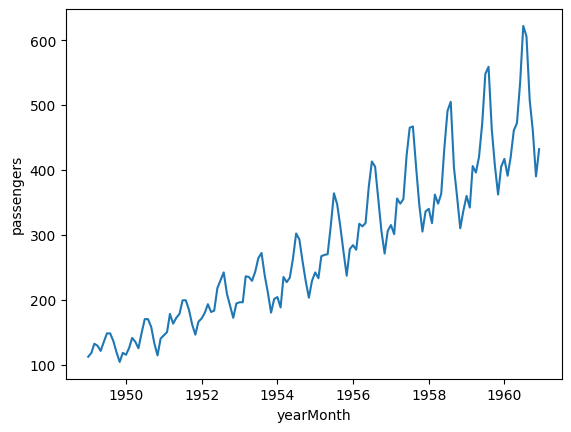

In [7]:
sns.lineplot(data=df,x=df.index,y=df.passengers)

In [8]:
df['rollMean']=df.passengers.rolling(window=12).mean()
df['rollStd']=df.passengers.rolling(window=12).std()

<Axes: xlabel='yearMonth', ylabel='passengers'>

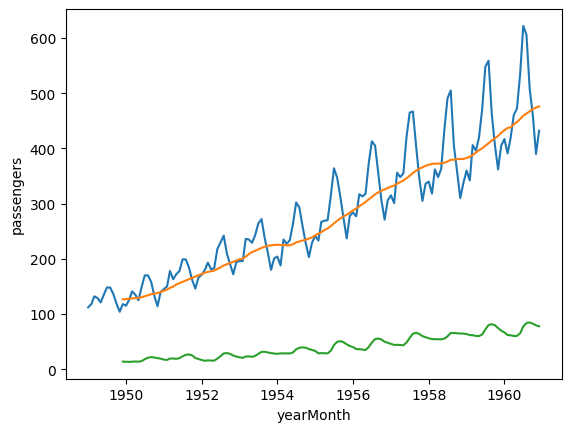

In [9]:

sns.lineplot(data=df,x=df.index,y=df.passengers)
sns.lineplot(data=df,x=df.index,y=df.rollMean)#yellow 
sns.lineplot(data=df,x=df.index,y=df.rollStd)

In [10]:
from statsmodels.tsa.stattools import adfuller
adfTest=adfuller(df['passengers'],autolag='AIC')
adfTest 

(0.8153688792060441,
 0.9918802434376409,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.692930839019)

In [11]:
testStats=pd.Series(adfTest[0:4], index=['Test Statistic','p-value','# lags used', 'number of observations'])
testStats

Test Statistic              0.815369
p-value                     0.991880
# lags used                13.000000
number of observations    130.000000
dtype: float64

In [13]:
for key , values in adfTest[4].items():
    print("criticality :",key , values)

criticality : 1% -3.4816817173418295
criticality : 5% -2.8840418343195267
criticality : 10% -2.578770059171598


critical values < Test Statistic so data not stationary

In [21]:
def test_stationarity(df , var):
    df['rollMean']=df[var].rolling(window=12).mean()
    df['rollStd']=df[var].rolling(window=12).std()
    
    from statsmodels.tsa.stattools import adfuller
    adfTest=adfuller(df[var],autolag='AIC')
    testStats=pd.Series(adfTest[0:4], index=['Test Statistic','p-value','# lags used', 'number of observations'])
    print(testStats)


    for key , values in adfTest[4].items():
       print("criticality :",key , values)



    sns.lineplot(data=df,x=df.index,y=var)
    sns.lineplot(data=df,x=df.index,y='rollMean')#yellow 
    sns.lineplot(data=df,x=df.index,y='rollStd')  


    
    

In [15]:
air_df=df[['passengers']]
air_df.head()

,passengers
yearMonth,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [17]:
#time shift to make data stationary

air_df['shift']=air_df.passengers.shift()
air_df['shiftDiff']=air_df.passengers-air_df['shift']
air_df.head()

C:\Users\samar\AppData\Local\Temp\ipykernel_30044\42372796.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  air_df['shift']=air_df.passengers.shift()
C:\Users\samar\AppData\Local\Temp\ipykernel_30044\42372796.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  air_df['shiftDiff']=air_df.passengers-air_df['shift']


,passengers,shift,shiftDiff
yearMonth,,,
1949-01-01,112,NaN,NaN
1949-02-01,118,112.0,6.0
1949-03-01,132,118.0,14.0
1949-04-01,129,132.0,-3.0
1949-05-01,121,129.0,-8.0


C:\Users\samar\AppData\Local\Temp\ipykernel_30044\3788067137.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rollMean']=df[var].rolling(window=12).mean()
C:\Users\samar\AppData\Local\Temp\ipykernel_30044\3788067137.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rollStd']=df[var].rolling(window=12).std()


Test Statistic             -2.829267
p-value                     0.054213
# lags used                12.000000
number of observations    130.000000
dtype: float64
criticality : 1% -3.4816817173418295
criticality : 5% -2.8840418343195267
criticality : 10% -2.578770059171598


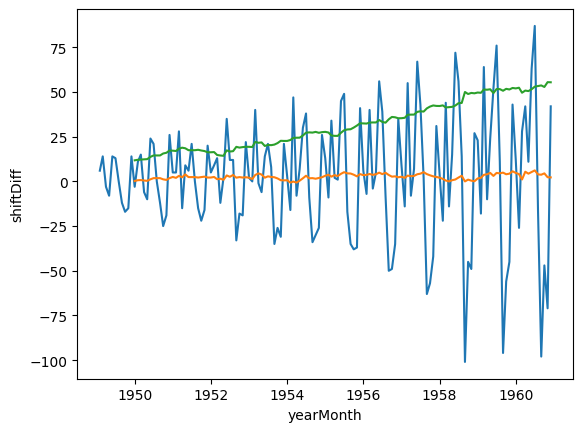

In [22]:
test_stationarity(air_df.dropna(),'shiftDiff')

In [25]:
airP=df[['passengers']].copy(deep=True)
airP['firstDiff']=airP['passengers'].diff()
airP['Diff12']=airP['passengers'].diff(12)
airP

,passengers,firstDiff,Diff12
yearMonth,,,
1949-01-01,112,NaN,NaN
1949-02-01,118,6.0,NaN
1949-03-01,132,14.0,NaN
1949-04-01,129,-3.0,NaN
1949-05-01,121,-8.0,NaN
...,...,...,...
1960-08-01,606,-16.0,47.0
1960-09-01,508,-98.0,45.0
1960-10-01,461,-47.0,54.0


In [38]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf



find value of p

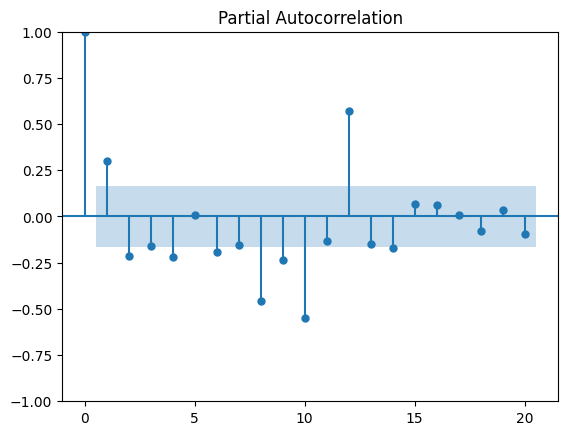

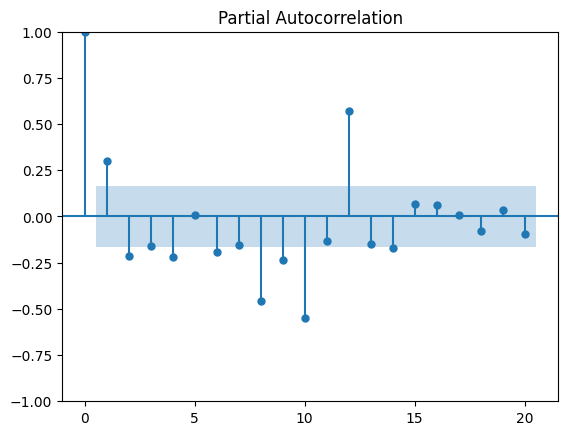

In [30]:
plot_pacf(airP['firstDiff'].dropna(),lags=20)

find value of q

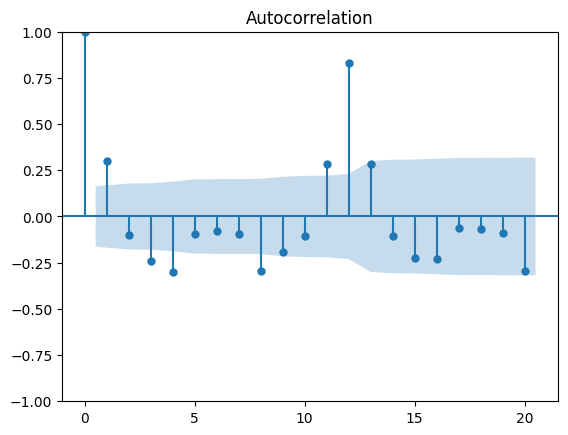

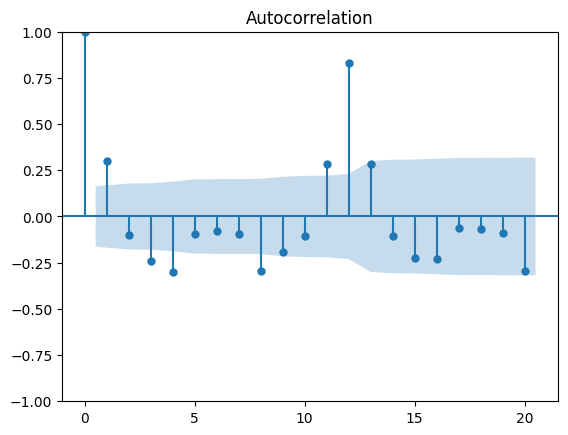

In [31]:
plot_acf(airP['firstDiff'].dropna(),lags=20)

<module 'matplotlib' from 'C:\\Users\\samar\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python311\\site-packages\\matplotlib\\__init__.py'>

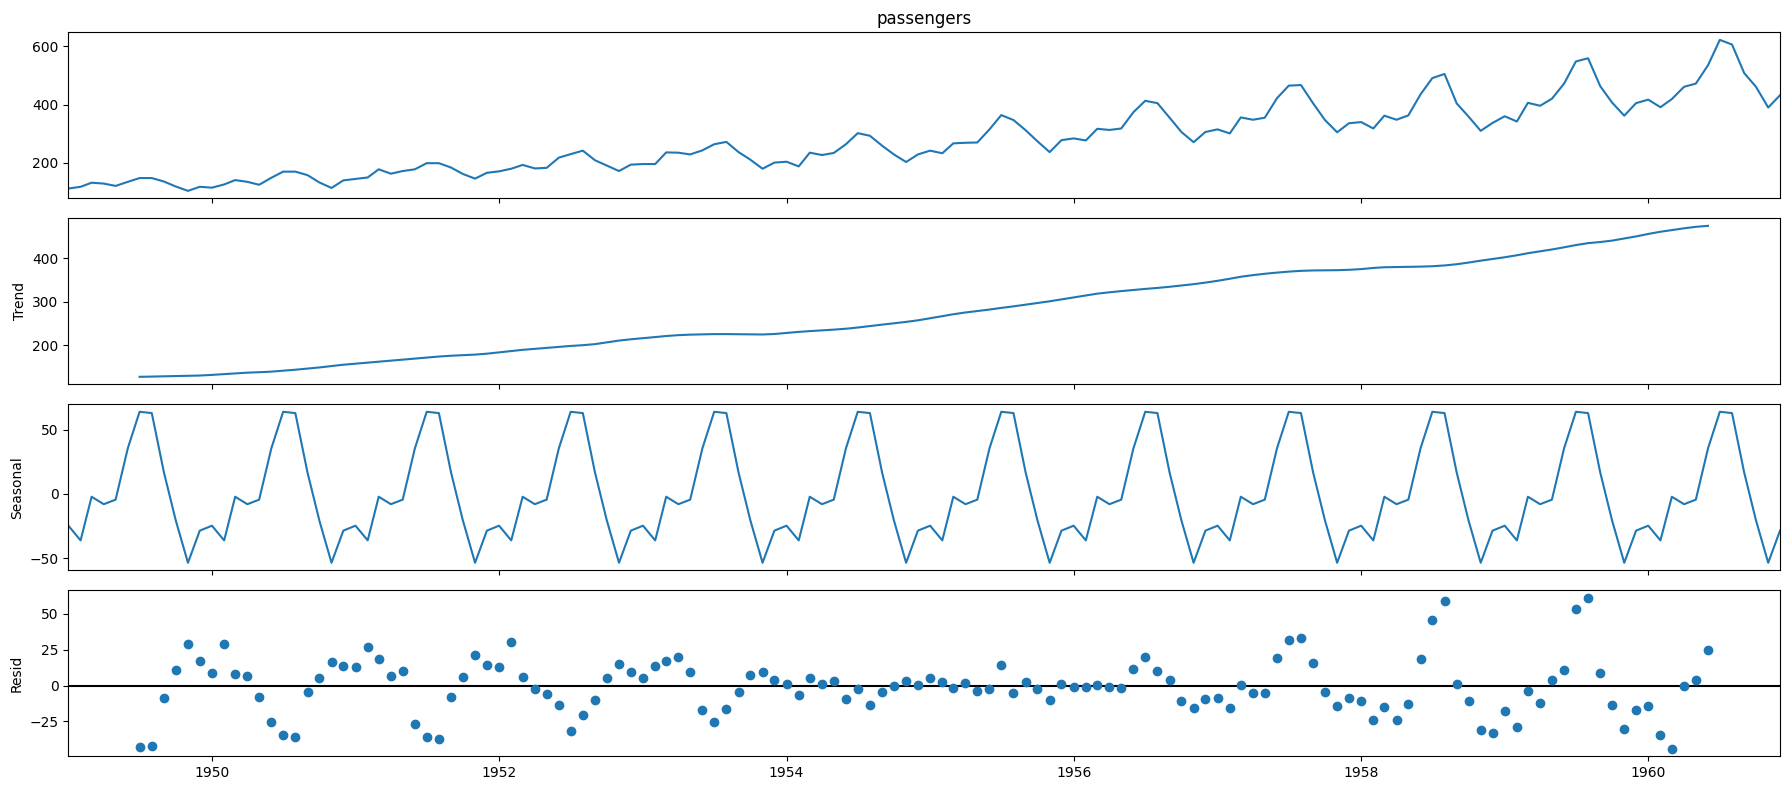

In [70]:

y = airP["passengers"]
import statsmodels.api as sm
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt

 p=1 q=3 d=1 

In [33]:
train=airP[:round(len(airP)*70/100)]
test=airP[round(len(airP)*70/100):]


In [39]:

model=ARIMA(train['passengers'],order=(1,1,3))
model_fit=model.fit()
pred=model_fit.predict(start=test.index[0],end=test.index[-1])

C:\Users\samar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [40]:
airP['arimaPred']=pred
airP.head()

,passengers,firstDiff,Diff12,arimaPred
yearMonth,,,,
1949-01-01,112,NaN,NaN,NaN
1949-02-01,118,6.0,NaN,NaN
1949-03-01,132,14.0,NaN,NaN
1949-04-01,129,-3.0,NaN,NaN
1949-05-01,121,-8.0,NaN,NaN


<Axes: xlabel='yearMonth', ylabel='passengers'>

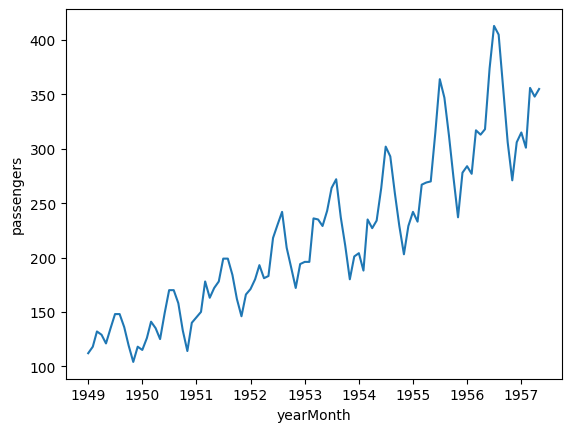

In [43]:
sns.lineplot(data=train , x=train.index , y='passengers')


<Axes: xlabel='yearMonth', ylabel='passengers'>

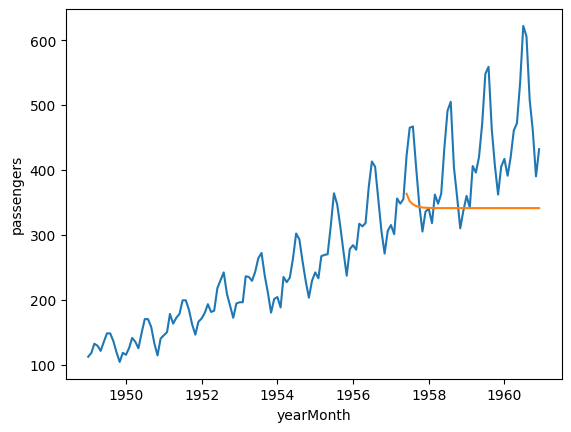

In [47]:
airP.dropna()
sns.lineplot(data=airP , x=airP.index , y='passengers')
sns.lineplot(data=airP , x=airP.index , y='arimaPred')


In [48]:
from sklearn.metrics import mean_squared_error

mean_squared_error(test['passengers'],pred)



12345.45505871823

In [56]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model=SARIMAX(train['passengers'],order=(1,1,3), seasonal_order=(1,1,3,12))
modelFit=model.fit()
predi=modelFit.predict(start=test.index[0],end=test.index[-1])
airP['sarimaxPred']=predi

C:\Users\samar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\samar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\samar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization

In [57]:
airP.tail()

,passengers,firstDiff,Diff12,arimaPred,sarimaxPred
yearMonth,,,,,
1960-08-01,606,-16.0,47.0,341.111333,599.430478
1960-09-01,508,-98.0,45.0,341.111333,534.546147
1960-10-01,461,-47.0,54.0,341.111333,479.573625
1960-11-01,390,-71.0,28.0,341.111333,431.914329
1960-12-01,432,42.0,27.0,341.111333,477.425298


<Axes: xlabel='yearMonth', ylabel='passengers'>

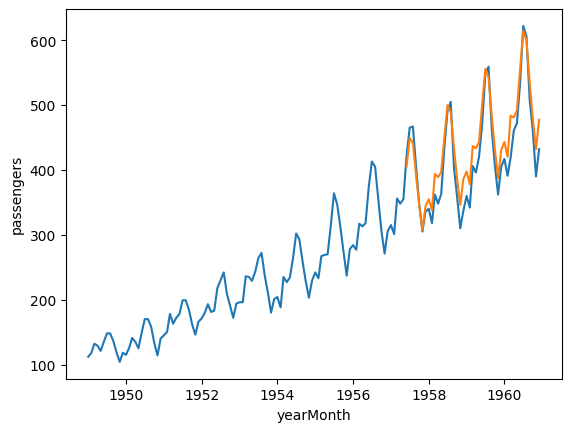

In [58]:
airP.dropna()
sns.lineplot(data=airP , x=airP.index , y='passengers')
sns.lineplot(data=airP , x=airP.index , y='sarimaxPred')

In [59]:
np.sqrt(mean_squared_error(test['passengers'],predi))

27.679617817036604

In [4]:
#find for future data 
dates=pd.DataFrame(pd.date_range(start='1961-01-01' , end='1962-12-01' , freq='MS'),columns=['Date'])
dates.set_index('Date', inplace=True)
dates


""
Date
1961-01-01
1961-02-01
1961-03-01
1961-04-01
1961-05-01
1961-06-01
1961-07-01
1961-08-01
1961-09-01


<Axes: xlabel='yearMonth', ylabel='passengers'>

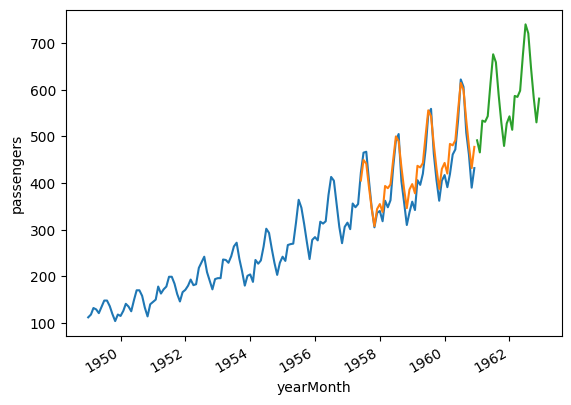

In [68]:
airP.dropna()
sns.lineplot(data=airP , x=airP.index , y='passengers')
sns.lineplot(data=airP , x=airP.index , y='sarimaxPred')
modelFit.predict(start=dates.index[0], end=dates.index[-1]).plot()
